In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as skdata
import sklearn.preprocessing as skprep
import sklearn.svm as sksvm
import sklearn.model_selection as sksel

In [2]:
def plot_frontiere(clf, window):
    x0s = np.linspace(window[0], window[1], 100)
    x1s = np.linspace(window[2], window[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred,  alpha=0.2)
    plt.contourf(x0, x1, y_decision,  alpha=0.1)

In [74]:
def plot_svm_regression(svm_reg, X, y,axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=14)
    plt.ylabel(r"$y$", fontsize=14)
    plt.legend(loc="upper left", fontsize=14)
    plt.axis(axes)

[2. 2.] [-2. -3.]


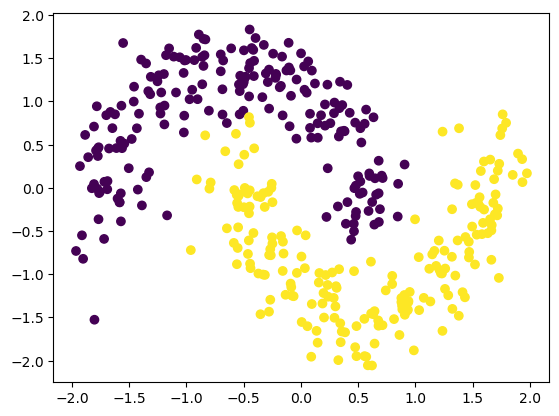

In [53]:
X1,y1=skdata.make_moons(n_samples=400,noise=0.15,random_state=42) # génération des données

X1norm=skprep.scale(X1)   # standardisation

minX=np.floor(X1norm.min(axis=0)) # calcul du min (pour la suite)
maxX=np.ceil(X1norm.max(axis=0))  # calcul du max (pour la suite)

print(maxX,minX)
plt.scatter(X1norm[:,0],X1norm[:,1],c=y1)

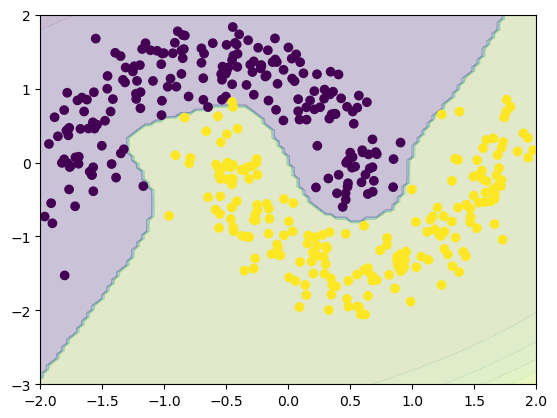

In [50]:
svm_model=sksvm.SVC(C=1.0, kernel='poly', degree=11, gamma='scale', coef0=1.0, shrinking=True, probability=False, 
                    tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, 
                    decision_function_shape='ovr', break_ties=False, random_state=None) # creation du model SVM avec les paramètres voulus,
svm_model.fit(X1norm,y1) # utilisation des données sur le modèle
plot_frontiere(svm_model,[minX[0],maxX[0],minX[1],maxX[1]]) # affichage des frontières
plt.scatter(X1norm[:,0],X1norm[:,1],c=y1) # affichage des points

1)  Degré appliqué au noyau polynomial = 3
    Valeur du terme de régularisation  = 1.0
    
2)  Augmente le terme de régularisation = Sur apprentissage

3)  Degré égal à 1 = fonction linear
    Augmente le degré du polynôme = Interpolation
    
4)  Comportement de son paramètre γ = 

In [75]:
np.random.seed(42)
n = 50
X2 = 6 * np.random.rand(n, 1)
y2 = (1.5* np.sin(X2) + X2 + np.random.randn(n,1)*0.7).ravel()

X2norm=skprep.scale(X2)

svm_reg=sksvm.SVR(kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, 
                  shrinking=True, cache_size=200, verbose=False, max_iter=-1)


plot_svm_regression(svm_reg, X2, y2,axes)


NameError: name 'axes' is not defined